In [1]:
import numpy as np
from astropy.coordinates import SkyCoord
from astropy import units as u
from targetexplore import Targets

In [2]:
from astropy.coordinates import SkyCoord
import astropy.units as u
import numpy as np

# Number of random pointings
n = 10

# Random RA between 0 and 360 degrees
ra = np.random.uniform(0, 360, n)

# Random Dec between -90 and +90 degrees
dec = np.arcsin(np.random.uniform(-1, 1, n)) * (180 / np.pi)

# Create the SkyCoord object
coords = SkyCoord(ra=ra * u.degree, dec=dec * u.degree, frame='icrs')

print(coords)

<SkyCoord (ICRS): (ra, dec) in deg
    [( 12.50295735,  16.39122107), (354.26989948,   4.34691583),
     (197.95597494, -32.74414996), (311.88789572, -12.83805753),
     (266.0571625 , -21.03275151), (229.41427291,  -3.36145231),
     (102.24735196, -37.15469395), (135.1879575 , -25.59596597),
     (226.31834721,  52.33903923), (269.04391114,  -3.25337635)]>


In [3]:
tgts = Targets(coords, telescope="MeerKAT", band="5b")

INFO: Query finished. [astroquery.utils.tap.core]


/datax/users/obs/osea/seticore/python/targetexplore/_utils/conversion.py:8: RuntimeWarning: divide by zero encountered in divide
  return c / (D * theta_FOV / 1.22) / 1e9


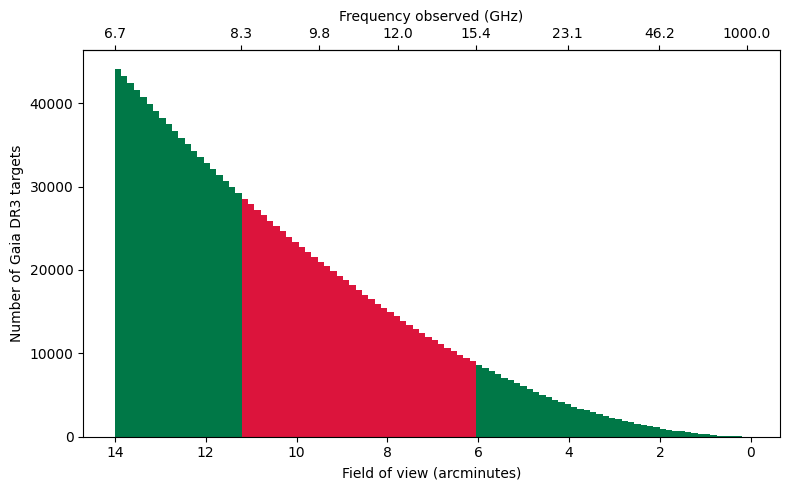

In [4]:
tgts.hist_separation()

<Axes: xlabel='distance (pc)', ylabel='number of targets'>

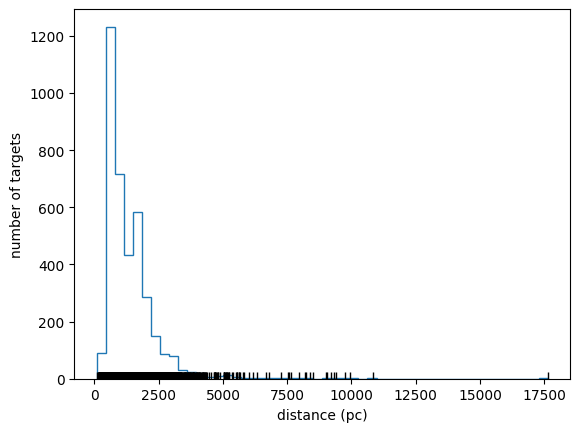

In [5]:
tgts.hist_distance(bins=50, mask_parallax=True)

/datax/users/obs/osea/seticore/python/targetexplore/_utils/distance.py:19: RuntimeWarning: divide by zero encountered in divide
  norm_posterior = posterior / simpson(posterior, r)


LinAlgError: When `allow_singular is False`, the input matrix must be symmetric positive definite.

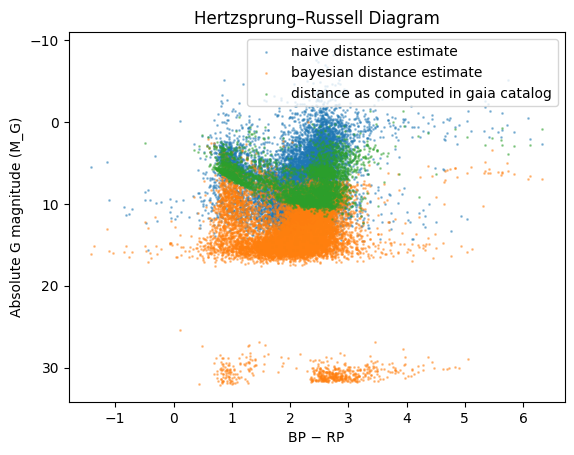

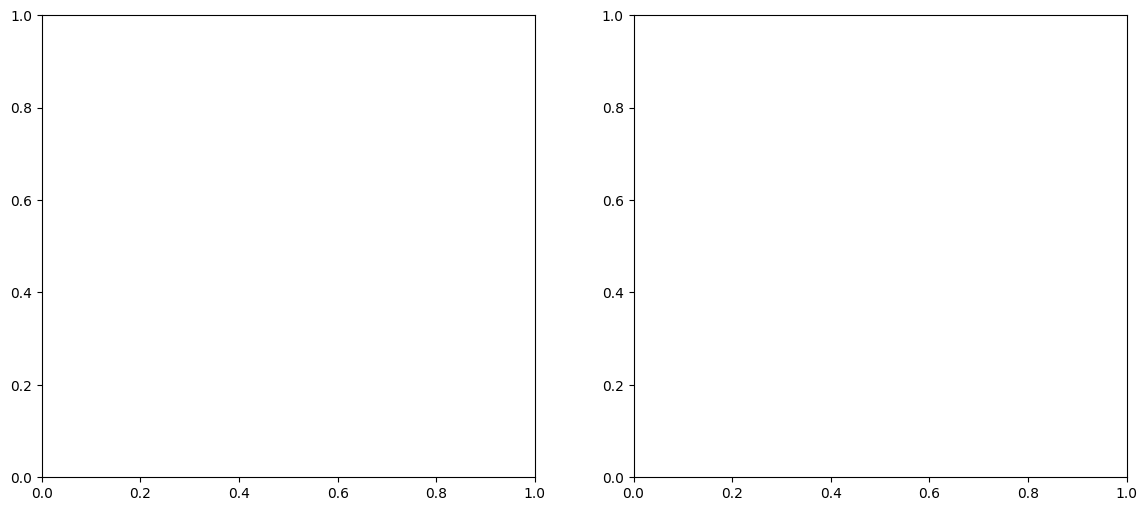

In [7]:
tgts.hr()